PLEASE FILL IN SECTIONS BELOW, REPLACING ITALIC TEXT WITH YOUR CONTENT

# Introduction
The data source is Census data that quantifies several attributes of commute practices in Orange County of workers aged 16 and up. The data contains several categories, for example:

- Mode of transportation (Car, Van, Truck, Bicycle, Taxicab and motorcycle)
- Average time to work
- Number of vehicles contained in the household (1, 2, or 3)
- Data is also by day

## Questions to answer

- What is the average commute time to work within Orange County
- What is the average number of vehicles per household in Orange County
- 

# Setup
## Data
VERY, VERY IMPORTANT PLEASE PROVIDE DEATILS ABOUT THE DATA YOU USED AND HOW TO GET IT SO OTHERS CAN RUN THIS AMAZING NOTEBOOK TOO

|Dataset               | Type           | Description                                     |  Where to get the data |
|----------------------|----------------|-------------------------------------------------|------------------------|
|                      |                |                                                 |                        |
|                      |                |                                                 |                        |
|                      |                |                                                 |                        |

## Environment
PLEASE RUN THE PANEL BELOW SO OTHERS KNOW EXACTLY THE ENVIRONMENT

In [1]:
# Add package installs here, for example ...
# !pip install pycurl

#!python -V
#!pip list

# list of package dependencies and their pip install commands
#!pip install geopandas
#!pip install census
#!pip install us
#!pip install geopandas hvplot
#!pip install cartopy geoviews


In [2]:
# Add imports here
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import geopandas as gpd
import hvplot.pandas
import holoviews as hv
import geoviews as gv
hv.extension('bokeh')
import os
import re
from census import Census
from us import states
from pathlib import Path

     

## Settings
PLEASE USE VARIABLES FOR THINGS LIKE FILE LOCATIONS AND CONFIGURATION SETTINGS

In [3]:
# Some examples ...
#DATA_DIRECTORY = './/'
#USER_NAME = ''

# Please always use environment variables for sensative credentials, never commit credentials to github
#USER_PASSWORD = os.environ['USER_PASSWORD']

## Data

In [4]:
# Put code here for getting your data. Use tools such as curl and wget if data is available online
# used data provided from US census. Downloaded csv file to local machine. 
# input csv file and put into dataframe

csvpath = Path("ACSST5Y2021.S0801-Data.csv")

#read in csv file and set to dataframe
commute_df = pd.read_csv(csvpath)

#show dataframe
commute_df.head()


,GEO_ID,NAME,S0801_C01_001E,S0801_C01_001M,S0801_C01_001MA,S0801_C01_001EA,S0801_C01_002E,S0801_C01_002M,S0801_C01_002MA,S0801_C01_002EA,...,S0801_C03_055EA,S0801_C03_056E,S0801_C03_056M,S0801_C03_056MA,S0801_C03_056EA,S0801_C03_057E,S0801_C03_057M,S0801_C03_057MA,S0801_C03_057EA,Unnamed: 686
0,Geography,Geographic Area Name,Estimate!!Total!!Workers 16 years and over,Margin of Error!!Total!!Workers 16 years and over,Annotation of Margin of Error!!Total!!Workers ...,Annotation of Estimate!!Total!!Workers 16 year...,Estimate!!Total!!Workers 16 years and over!!ME...,Margin of Error!!Total!!Workers 16 years and o...,Annotation of Margin of Error!!Total!!Workers ...,Annotation of Estimate!!Total!!Workers 16 year...,...,Annotation of Estimate!!Female!!PERCENT ALLOCA...,Estimate!!Female!!PERCENT ALLOCATED!!Travel ti...,Margin of Error!!Female!!PERCENT ALLOCATED!!Tr...,Annotation of Margin of Error!!Female!!PERCENT...,Annotation of Estimate!!Female!!PERCENT ALLOCA...,Estimate!!Female!!PERCENT ALLOCATED!!Vehicles ...,Margin of Error!!Female!!PERCENT ALLOCATED!!Ve...,Annotation of Margin of Error!!Female!!PERCENT...,Annotation of Estimate!!Female!!PERCENT ALLOCA...,NaN
1,1400000US12095010201,"Census Tract 102.01, Orange County, Florida",1315,305,NaN,NaN,73.2,10.1,NaN,NaN,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),NaN
2,1400000US12095010202,"Census Tract 102.02, Orange County, Florida",2441,459,NaN,NaN,70.5,7.5,NaN,NaN,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),NaN
3,1400000US12095010300,"Census Tract 103, Orange County, Florida",1515,279,NaN,NaN,82.1,7.3,NaN,NaN,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),NaN
4,1400000US12095010400,"Census Tract 104, Orange County, Florida",333,80,NaN,NaN,71.8,15.2,NaN,NaN,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),NaN


In [5]:
csvpath = Path("florida_census_map.csv")

#read in csv file and set to dataframe
flmap_df = pd.read_csv(csvpath)

#show dataframe
flmap_df.head()

,MTFCC,OID,GEOID,STATE,COUNTY,TRACT,BASENAME,NAME,LSADC,FUNCSTAT,AREALAND,AREAWATER,UR,CENTLAT,CENTLON,INTPTLAT,INTPTLON
0,G5020,2.079020e+15,12001000201,12,1,201,2.01,Census Tract 2.01,CT,S,1238506.0,NaN,NaN,29.654541,-82.333741,29.654541,-82.333741
1,G5020,2.079020e+15,12001000202,12,1,202,2.02,Census Tract 2.02,CT,S,857504.0,NaN,NaN,29.646160,-82.332953,29.646160,-82.332953
2,G5020,2.079040e+14,12001000301,12,1,301,3.01,Census Tract 3.01,CT,S,2479034.0,22169.0,NaN,29.666687,-82.331211,29.668004,-82.331418
3,G5020,2.079040e+14,12001000302,12,1,302,3.02,Census Tract 3.02,CT,S,3819522.0,14011.0,NaN,29.683592,-82.330501,29.684245,-82.330056
4,G5020,2.079030e+13,12001000400,12,1,400,4.00,Census Tract 4,CT,S,6010490.0,18712.0,NaN,29.677786,-82.307876,29.679476,-82.308121


In [6]:
flmap_df.dtypes

MTFCC         object
OID          float64
GEOID          int64
STATE          int64
COUNTY         int64
TRACT          int64
BASENAME     float64
NAME          object
LSADC         object
FUNCSTAT      object
AREALAND     float64
AREAWATER    float64
UR           float64
CENTLAT      float64
CENTLON      float64
INTPTLAT     float64
INTPTLON     float64
dtype: object

In [7]:
# check the number of rows and columns in the dataframe
commute_df.shape

(268, 687)

In [8]:
# check the variable type in the dataframe
commute_df.dtypes

GEO_ID              object
NAME                object
S0801_C01_001E      object
S0801_C01_001M      object
S0801_C01_001MA     object
                    ...   
S0801_C03_057E      object
S0801_C03_057M      object
S0801_C03_057MA     object
S0801_C03_057EA     object
Unnamed: 686       float64
Length: 687, dtype: object

## Data Cleaning
- The metadata file has a description of the values in each column in the csv file. I used this file as a key to understand what data is contained within the columns of the csv file. The data included in the file shows the time it takes to commute within Orange County, as well as the number of available to workers 16 and up. I found that the following columns helpful:
- S0801_C01_046E = The travel time to work in minutes for workers 16yrs and older
- S0801_C02_046E = The travel time to work in minutes for male workers 16 yrs and older
- S0801_C03_046E = The travel time to work in minutes for female workers 16 yrs an older
- S0801_C01_047E = The number of workers available within the census tract
- S0801_C01_048E = The number of % of workers with no vehicle available
- S0801_C01_049E = The number of % of workers with 1 vehicle available
- S0801_C01_050E = The number of % of workers with 2 vehicles available
- S0801_C01_051E = The number of % of workers with 3 vehicles available
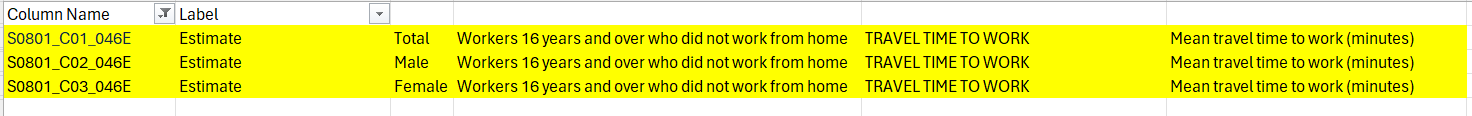
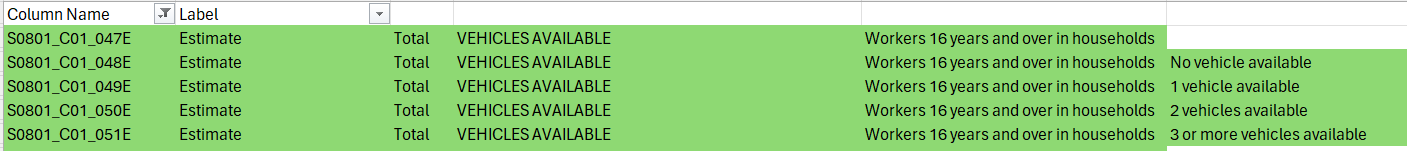


In [9]:
#remove columns with NaN values
commute_df_clean = commute_df.dropna(axis = 'columns')

commute_df_clean.shape


(268, 374)

### Setting up the Average Commute Time DataFrame

In [10]:
# select columns that correspond to data on average travel time to work by sex
# data can be summarized to calculate the overall average commute times within orange county

avg_time_df = commute_df_clean.loc[ :,['GEO_ID','S0801_C01_046E','S0801_C02_046E','S0801_C03_046E']]

# view dataframe to validate dataframe slice
pd.concat([avg_time_df.head(), avg_time_df.tail()])

,GEO_ID,S0801_C01_046E,S0801_C02_046E,S0801_C03_046E
0,Geography,Estimate!!Total!!Workers 16 years and over who...,Estimate!!Male!!Workers 16 years and over who ...,Estimate!!Female!!Workers 16 years and over wh...
1,1400000US12095010201,22.1,26.0,18.5
2,1400000US12095010202,24.8,20.6,30.9
3,1400000US12095010300,20.7,22.1,19.1
4,1400000US12095010400,44.6,58.1,27.3
263,1400000US12095018800,24.5,24.7,24.3
264,1400000US12095018901,17.0,18.2,16.0
265,1400000US12095018902,29.0,31.1,26.6
266,1400000US12095019000,22.7,25.0,20.6
267,1400000US12095990000,-,-,-


In [11]:
# selecting the columns from the dataframe that correspond to commute time in minutes
# convert the commute times in minutes from an python object to a numerical value

numbr_cols = avg_time_df[['S0801_C01_046E','S0801_C02_046E','S0801_C03_046E']]

#converting values from string to float
for cols in numbr_cols:
    try:
        avg_time_df[cols]= pd.to_numeric(avg_time_df[cols],errors = 'coerce')
    except ValueError:
        pass 

avg_time_df.dtypes


GEO_ID             object
S0801_C01_046E    float64
S0801_C02_046E    float64
S0801_C03_046E    float64
dtype: object

In [12]:
# renaming the dataframe columns to meaningful names 
avg_time_df = avg_time_df.rename(columns ={'S0801_C01_046E':'Total_Workers_Commute_Time','S0801_C02_046E':'Male_Workers_Commute_Time',
                                           'S0801_C03_046E' :'Female_Workers_Commute_Time'})
avg_time_df.head()

,GEO_ID,Total_Workers_Commute_Time,Male_Workers_Commute_Time,Female_Workers_Commute_Time
0,Geography,NaN,NaN,NaN
1,1400000US12095010201,22.1,26.0,18.5
2,1400000US12095010202,24.8,20.6,30.9
3,1400000US12095010300,20.7,22.1,19.1
4,1400000US12095010400,44.6,58.1,27.3


In [13]:
# remove the first row from the dataframe
avg_time_df.drop(0, inplace = True)

In [14]:
# drop all of the na values in the dataframe
avg_time_df.dropna()

,GEO_ID,Total_Workers_Commute_Time,Male_Workers_Commute_Time,Female_Workers_Commute_Time
1,1400000US12095010201,22.1,26.0,18.5
2,1400000US12095010202,24.8,20.6,30.9
3,1400000US12095010300,20.7,22.1,19.1
4,1400000US12095010400,44.6,58.1,27.3
5,1400000US12095010500,38.1,24.6,44.8
...,...,...,...,...
262,1400000US12095018700,27.5,24.3,30.0
263,1400000US12095018800,24.5,24.7,24.3
264,1400000US12095018901,17.0,18.2,16.0
265,1400000US12095018902,29.0,31.1,26.6


### Setting up the Travel Time to Work

In [51]:
# select columns that correspond to data on average travel time to work by sex
# data can be summarized to calculate the overall average commute times within orange county

travel_time_cols =[]
travel_time_cols = ['S0801_C01_037E','S0801_C01_038E','S0801_C01_039E','S0801_C01_040E','S0801_C01_041E','S0801_C01_042E','S0801_C01_043E','S0801_C01_044E',
                   'S0801_C02_037E','S0801_C02_038E','S0801_C02_039E','S0801_C02_040E','S0801_C02_041E','S0801_C02_042E','S0801_C02_043E','S0801_C02_044E',
                   'S0801_C03_037E','S0801_C03_038E','S0801_C03_039E','S0801_C03_040E','S0801_C03_041E','S0801_C03_042E','S0801_C03_043E','S0801_C03_044E']

travel_time_df = commute_df_clean[['GEO_ID']+ travel_time_cols]

# view dataframe to validate dataframe slice
pd.concat([travel_time_df.head(), travel_time_df.tail()])

,GEO_ID,S0801_C01_037E,S0801_C01_038E,S0801_C01_039E,S0801_C01_040E,S0801_C01_041E,S0801_C01_042E,S0801_C01_043E,S0801_C01_044E,S0801_C02_037E,...,S0801_C02_043E,S0801_C02_044E,S0801_C03_037E,S0801_C03_038E,S0801_C03_039E,S0801_C03_040E,S0801_C03_041E,S0801_C03_042E,S0801_C03_043E,S0801_C03_044E
0,Geography,Estimate!!Total!!Workers 16 years and over who...,Estimate!!Total!!Workers 16 years and over who...,Estimate!!Total!!Workers 16 years and over who...,Estimate!!Total!!Workers 16 years and over who...,Estimate!!Total!!Workers 16 years and over who...,Estimate!!Total!!Workers 16 years and over who...,Estimate!!Total!!Workers 16 years and over who...,Estimate!!Total!!Workers 16 years and over who...,Estimate!!Male!!Workers 16 years and over who ...,...,Estimate!!Male!!Workers 16 years and over who ...,Estimate!!Male!!Workers 16 years and over who ...,Estimate!!Female!!Workers 16 years and over wh...,Estimate!!Female!!Workers 16 years and over wh...,Estimate!!Female!!Workers 16 years and over wh...,Estimate!!Female!!Workers 16 years and over wh...,Estimate!!Female!!Workers 16 years and over wh...,Estimate!!Female!!Workers 16 years and over wh...,Estimate!!Female!!Workers 16 years and over wh...,Estimate!!Female!!Workers 16 years and over wh...
1,1400000US12095010201,25.8,10.2,10.7,13.7,5.9,21.2,7.7,0.0,15.4,...,12.3,0.0,35.5,10.2,8.1,6.2,11.5,22.4,3.4,0.0
2,1400000US12095010202,16.0,13.9,12.5,16.8,5.3,21.6,2.5,5.0,17.8,...,2.6,3.4,13.4,13.2,16.5,14.3,4.5,16.6,2.4,7.3
3,1400000US12095010300,9.0,18.6,16.4,17.0,17.1,14.7,6.1,0.0,6.6,...,6.6,0.0,11.6,20.6,25.3,15.8,9.0,11.1,5.5,0.0
4,1400000US12095010400,24.9,4.0,3.1,1.2,0.6,20.6,15.4,12.3,35.5,...,18.6,8.7,11.3,9.2,7.0,2.8,0.0,41.5,11.3,16.9
263,1400000US12095018800,10.6,20.1,13.5,15.3,9.7,14.0,9.6,1.6,14.7,...,4.6,1.8,3.0,10.2,22.1,22.5,5.4,14.5,18.9,1.3
264,1400000US12095018901,29.1,12.5,18.5,19.5,6.2,4.4,7.5,0.0,27.7,...,0.0,0.0,30.4,9.1,28.2,17.9,0.0,0.0,14.5,0.0
265,1400000US12095018902,10.8,6.6,13.5,16.3,10.9,19.6,8.7,6.2,19.1,...,3.1,5.2,1.5,10.2,15.9,8.5,3.3,38.4,14.9,7.3
266,1400000US12095019000,10.3,19.8,18.1,12.8,7.5,15.8,1.0,8.8,11.5,...,0.5,14.0,9.1,19.5,21.8,15.2,7.3,19.0,1.5,3.8
267,1400000US12095990000,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


### Selecting the % of vehicles 

In [53]:
# select columns that correspond to data on average travel time to work by sex
# data can be summarized to calculate the overall average commute times within orange county

num_of_vehicles_df = commute_df_clean.loc[ :,['GEO_ID','S0801_C01_047E','S0801_C01_048E','S0801_C01_049E','S0801_C01_050E','S0801_C01_051E']]

# view dataframe to validate dataframe slice
pd.concat([num_of_vehicles_df.head(), num_of_vehicles_df.tail()])

,GEO_ID,S0801_C01_047E,S0801_C01_048E,S0801_C01_049E,S0801_C01_050E,S0801_C01_051E
0,Geography,Estimate!!Total!!VEHICLES AVAILABLE!!Workers 1...,Estimate!!Total!!VEHICLES AVAILABLE!!Workers 1...,Estimate!!Total!!VEHICLES AVAILABLE!!Workers 1...,Estimate!!Total!!VEHICLES AVAILABLE!!Workers 1...,Estimate!!Total!!VEHICLES AVAILABLE!!Workers 1...
1,1400000US12095010201,1315,4.6,56.4,26.2,12.9
2,1400000US12095010202,2441,0.6,45.1,47.1,7.2
3,1400000US12095010300,1509,1.7,43.1,47.6,7.6
4,1400000US12095010400,331,32.9,34.4,32.6,0.0
263,1400000US12095018800,3643,1.5,30.1,57.6,10.8
264,1400000US12095018901,1519,7.1,38.9,48.7,5.3
265,1400000US12095018902,2808,0.0,70.5,19.5,10.0
266,1400000US12095019000,2256,0.9,34.9,42.9,21.3
267,1400000US12095990000,0,-,-,-,-


In [54]:
# selecting the columns from the dataframe that correspond to commute time in minutes
# convert the commute times in minutes from an python object to a numerical value

numbr_cols2 = num_of_vehicles_df[['S0801_C01_047E','S0801_C01_048E','S0801_C01_049E','S0801_C01_050E','S0801_C01_051E']]

#converting values from string to float
for cols in numbr_cols2:
    try:
        num_of_vehicles_df[cols]= pd.to_numeric(num_of_vehicles_df[cols],errors = 'coerce')
    except ValueError:
        pass 

num_of_vehicles_df.dtypes


GEO_ID             object
S0801_C01_047E    float64
S0801_C01_048E    float64
S0801_C01_049E    float64
S0801_C01_050E    float64
S0801_C01_051E    float64
dtype: object

In [18]:
# remove the first row from the dataframe
num_of_vehicles_df.drop(0, inplace = True)

In [19]:
# drop all of the na values in the dataframe
num_of_vehicles_df.dropna()

,GEO_ID,S0801_C01_047E,S0801_C01_048E,S0801_C01_049E,S0801_C01_050E,S0801_C01_051E
1,1400000US12095010201,1315.0,4.6,56.4,26.2,12.9
2,1400000US12095010202,2441.0,0.6,45.1,47.1,7.2
3,1400000US12095010300,1509.0,1.7,43.1,47.6,7.6
4,1400000US12095010400,331.0,32.9,34.4,32.6,0.0
5,1400000US12095010500,184.0,16.3,71.2,12.5,0.0
...,...,...,...,...,...,...
262,1400000US12095018700,1731.0,5.7,38.3,30.0,26.1
263,1400000US12095018800,3643.0,1.5,30.1,57.6,10.8
264,1400000US12095018901,1519.0,7.1,38.9,48.7,5.3
265,1400000US12095018902,2808.0,0.0,70.5,19.5,10.0


In [20]:
# renaming the dataframe columns to meaningful names 
num_of_vehicles_df = num_of_vehicles_df.rename(columns ={'S0801_C01_047E':'Total_Workers_16plus','S0801_C01_048E':'%_No_Vehicle_Available',
                                           'S0801_C01_049E' :'%_One_Vehicle_Available','S0801_C01_050E' :'%_Two_Vehicle_Available',
                                            'S0801_C01_051E' :'%_Three_or_more_Vehicle_Available'})
num_of_vehicles_df.head()

,GEO_ID,Total_Workers_16plus,%_No_Vehicle_Available,%_One_Vehicle_Avaialable,%_Two_Vehicle_Available,%_Three_or_more_Vehicle_Available
1,1400000US12095010201,1315.0,4.6,56.4,26.2,12.9
2,1400000US12095010202,2441.0,0.6,45.1,47.1,7.2
3,1400000US12095010300,1509.0,1.7,43.1,47.6,7.6
4,1400000US12095010400,331.0,32.9,34.4,32.6,0.0
5,1400000US12095010500,184.0,16.3,71.2,12.5,0.0


## Analysis

In [21]:
#summary statistics
avg_time_df.describe()

,Total_Workers_Commute_Time,Male_Workers_Commute_Time,Female_Workers_Commute_Time
count,266.000000,265.000000,266.000000
mean,28.375564,29.520377,27.096241
std,5.123881,6.171946,6.003928
min,13.900000,13.500000,13.100000
25%,25.000000,25.600000,23.300000
50%,28.050000,28.900000,26.700000
75%,31.000000,32.300000,29.800000
max,53.100000,59.700000,69.000000


### Average commute time within Orange County for workers 16 and up is around 28.37 minutes, with a max time of 53 minutes. 

In [22]:
#summary statistics
num_of_vehicles_df.describe()

,Total_Workers_16plus,%_No_Vehicle_Available,%_One_Vehicle_Avaialable,%_Two_Vehicle_Available,%_Three_or_more_Vehicle_Available
count,267.000000,265.000000,265.000000,265.000000,265.000000
mean,2634.235955,2.958491,23.011698,44.433585,29.594717
std,1277.461295,4.841317,13.415549,12.372919,14.447933
min,0.000000,0.000000,0.000000,6.200000,0.000000
25%,1787.000000,0.000000,11.900000,36.300000,18.700000
50%,2557.000000,1.000000,21.100000,44.700000,29.100000
75%,3288.500000,3.900000,31.900000,53.000000,39.300000
max,9463.000000,36.600000,71.200000,86.800000,93.800000


## Map plot of Commute Times

In [24]:
# remove the prefix '1400000US' from GEO_ID to enable data to be joined with flmap_df
avg_time_df['GEO_ID'] = avg_time_df['GEO_ID'].str.replace('1400000US', '')

In [25]:
# checking to make sure that the GEO_ID type is still an object
avg_time_df.dtypes

GEO_ID                          object
Total_Workers_Commute_Time     float64
Male_Workers_Commute_Time      float64
Female_Workers_Commute_Time    float64
dtype: object

In [26]:
# renaming the column GEO_ID to GEOID to match the flmap_df
avg_time_df= avg_time_df.rename(columns= {'GEO_ID' :'GEOID'})
avg_time_df.head()

,GEOID,Total_Workers_Commute_Time,Male_Workers_Commute_Time,Female_Workers_Commute_Time
1,12095010201,22.1,26.0,18.5
2,12095010202,24.8,20.6,30.9
3,12095010300,20.7,22.1,19.1
4,12095010400,44.6,58.1,27.3
5,12095010500,38.1,24.6,44.8


In [27]:
# change GEOID to be numeric and check to make sure that the GEOID column is now an integer. This is out table join 
avg_time_df['GEOID'] =pd.to_numeric(avg_time_df['GEOID'])

avg_time_df.dtypes

GEOID                            int64
Total_Workers_Commute_Time     float64
Male_Workers_Commute_Time      float64
Female_Workers_Commute_Time    float64
dtype: object

In [28]:
# joining the average time dataframe with the florida map dataframe to create a dataframe to plot a density map

col_to_keep = ['GEOID','Total_Workers_Commute_Time','CENTLAT','CENTLON']

map_df = avg_time_df.merge(flmap_df, on ='GEOID', how = 'left')[col_to_keep]

display(map_df)

,GEOID,Total_Workers_Commute_Time,CENTLAT,CENTLON
0,12095010201,22.1,28.547849,-81.372490
1,12095010202,24.8,28.543585,-81.367356
2,12095010300,20.7,28.534029,-81.368659
3,12095010400,44.6,28.533175,-81.390856
4,12095010500,38.1,28.537650,-81.389965
...,...,...,...,...
262,12095018800,24.5,28.563696,-81.371982
263,12095018901,17.0,28.550981,-81.388438
264,12095018902,29.0,28.543422,-81.378796
265,12095019000,22.7,28.595842,-81.374086


In [29]:
# Create a plot to analyze neighborhood info
map_plot = map_df.hvplot.points(
    'CENTLON', 
    'CENTLAT', 
    geo=True, 
    color='Total_Workers_Commute_Time',
    scale = 0.9,
    alpha=1,
    tiles = 'OSM',
    title = 'Average Commute Times for Workers 16+ in Orange County,Florida',
    frame_width = 700,
    frame_height = 500,
        )

map_plot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [CENTLON,CENTLAT]   (Total_Workers_Commute_Time)

## Map Plot of Number of Vehicles

In [30]:
# remove the prefix '1400000US' from GEO_ID to enable data to be joined with flmap_df
num_of_vehicles_df['GEO_ID'] = num_of_vehicles_df['GEO_ID'].str.replace('1400000US', '')

In [31]:
# checking to make sure that the GEO_ID type is still an object
num_of_vehicles_df.dtypes

GEO_ID                                object
Total_Workers_16plus                 float64
%_No_Vehicle_Available               float64
%_One_Vehicle_Avaialable             float64
%_Two_Vehicle_Available              float64
%_Three_or_more_Vehicle_Available    float64
dtype: object

In [32]:
# renaming the column GEO_ID to GEOID to match the flmap_df
num_of_vehicles_df= num_of_vehicles_df.rename(columns= {'GEO_ID' :'GEOID'})
num_of_vehicles_df.head()

,GEOID,Total_Workers_16plus,%_No_Vehicle_Available,%_One_Vehicle_Avaialable,%_Two_Vehicle_Available,%_Three_or_more_Vehicle_Available
1,12095010201,1315.0,4.6,56.4,26.2,12.9
2,12095010202,2441.0,0.6,45.1,47.1,7.2
3,12095010300,1509.0,1.7,43.1,47.6,7.6
4,12095010400,331.0,32.9,34.4,32.6,0.0
5,12095010500,184.0,16.3,71.2,12.5,0.0


In [33]:
# change GEOID to be numeric and check to make sure that the GEOID column is now an integer. This is out table join 
#num_of_vehicles_df['GEOID'] =pd.to_numeric(num_of_vehicles_df['GEOID'])

num_of_vehicles_df.dtypes

GEOID                                 object
Total_Workers_16plus                 float64
%_No_Vehicle_Available               float64
%_One_Vehicle_Avaialable             float64
%_Two_Vehicle_Available              float64
%_Three_or_more_Vehicle_Available    float64
dtype: object

In [34]:
# joining the average time dataframe with the florida map dataframe to create a dataframe to plot a density map

col_to_keep2 = ['GEOID','Households_with_Two_Vehicle_Available','CENTLAT','CENTLON']

map_df2 = avg_time_df.merge(flmap_df, on ='GEOID', how = 'left')[col_to_keep]

display(map_df2)

,GEOID,Total_Workers_Commute_Time,CENTLAT,CENTLON
0,12095010201,22.1,28.547849,-81.372490
1,12095010202,24.8,28.543585,-81.367356
2,12095010300,20.7,28.534029,-81.368659
3,12095010400,44.6,28.533175,-81.390856
4,12095010500,38.1,28.537650,-81.389965
...,...,...,...,...
262,12095018800,24.5,28.563696,-81.371982
263,12095018901,17.0,28.550981,-81.388438
264,12095018902,29.0,28.543422,-81.378796
265,12095019000,22.7,28.595842,-81.374086


In [35]:
# Create a plot to analyze neighborhood info
map_plot2 = map_df2.hvplot.points(
    'CENTLON', 
    'CENTLAT', 
    geo=True, 
    color='',
    scale = 0.9,
    alpha=1,
    tiles = 'OSM',
    title = 'Average Commute Times for Workers 16+ in Orange County,Florida',
    frame_width = 700,
    frame_height = 500,
        )

map_plot2

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [CENTLON,CENTLAT]